In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

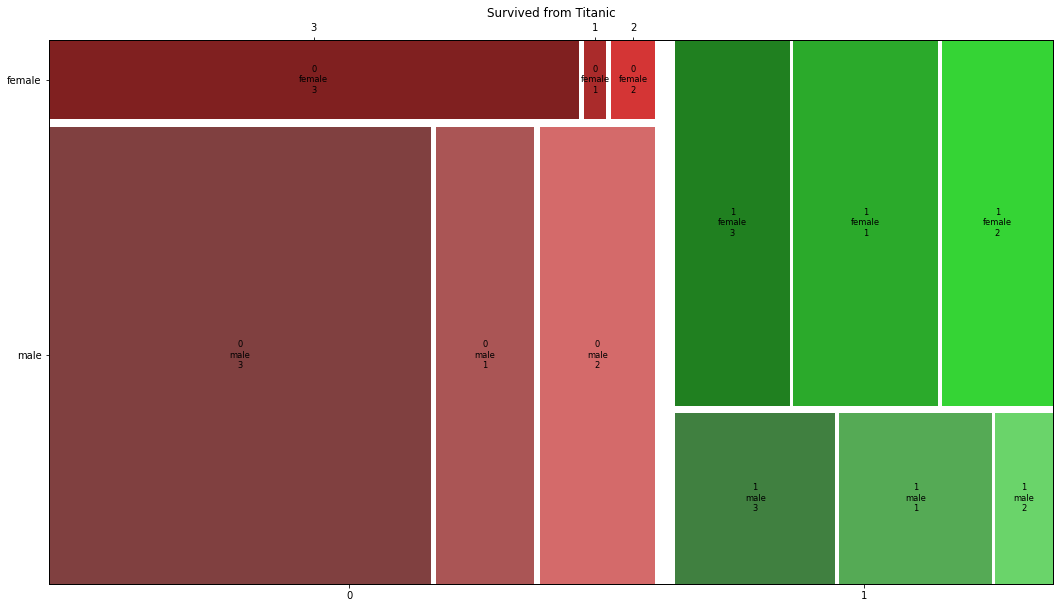

In [21]:
# код для графика

data = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
plt.rcParams['figure.figsize']=(18, 10) # ура, установили размер
mosaic(data, ['Survived', 'Sex', 'Pclass'], gap = 0.02, title='Survived from Titanic')
plt.show()

In [22]:
pd.crosstab(data.query('Sex == "female"').Survived, data.query('Sex == "female"').Pclass) # Для женщин

Pclass,1,2,3
Survived,,,
0,3,6,72
1,91,70,72


In [23]:
pd.crosstab(data.query('Sex == "male"').Survived, data.query('Sex == "male"').Pclass) # для мужчин

Pclass,1,2,3
Survived,,,
0,77,91,300
1,45,17,47


Intercept = 0.5
DrugsDrug2 = 1.0
SexMale = 4.0



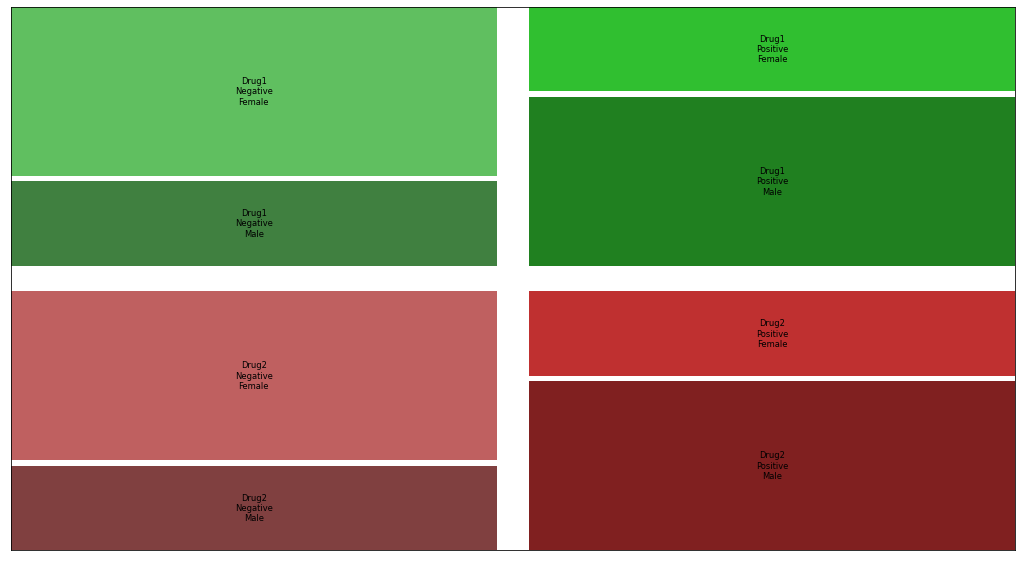

In [24]:
data = {
    ('Drug2', 'Negative', 'Male'  ): 1,
    ('Drug2', 'Positive', 'Male'  ): 2,
    ('Drug2', 'Negative', 'Female'): 2,
    ('Drug2', 'Positive', 'Female'): 1,
           
    ('Drug1', 'Negative', 'Male'  ): 1,
    ('Drug1', 'Positive', 'Male'  ): 2,
    ('Drug1', 'Negative', 'Female'): 2,
    ('Drug1', 'Positive', 'Female'): 1,
}

ax = mosaic(data, horizontal=0, gap=.05, axes_label=0)

odds_F_Pos_Drug1 = data[('Drug1', 'Positive', 'Female')] / \
                   data[('Drug1', 'Negative', 'Female')]
odds_F_Neg_Drug1 = 1 / odds_F_Pos_Drug1
odds_M_Pos_Drug1 = data[('Drug1', 'Positive', 'Male')] / \
                   data[('Drug1', 'Negative', 'Male')]
odds_M_Neg_Drug1 = 1 / odds_M_Pos_Drug1
odds_F_Pos_Drug2 = data[('Drug2', 'Positive', 'Female')] / \
                   data[('Drug2', 'Negative', 'Female')]

print(f'Intercept = {odds_F_Pos_Drug1}')
print(f'DrugsDrug2 = {odds_F_Pos_Drug2 / odds_F_Pos_Drug1}')
print(f'SexMale = {odds_M_Pos_Drug1 / odds_F_Pos_Drug1}')
print()

### Task 1
После того как вы восстановили формулу регрессии в предыдущем примере, рассчитайте с её помощью вероятность снять головную боль после приёма настоящего лекарства мужчиной.

In [25]:
x = -1.15+0.8+2.13-0.17
np.exp(x)/(1+np.exp(x))

0.8334113864245404